In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path="datasets/housing"
housing_url = download_root+housing_path+ "/housing.tgz"

In [3]:
def fetch_data(housing_url , housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path , "housing.tgz")
    urllib.request.urlretrieve(housing_url , tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [6]:
# fetch_data(housing_url,housing_path)

In [7]:
import pandas as pd

In [8]:
def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path , "housing.csv")
    return pd.read_csv(csv_path)


In [9]:
dataframe = load_housing_data("datasets/housing")

In [10]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
dataframe["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6512B4688>,
      dtype=object)

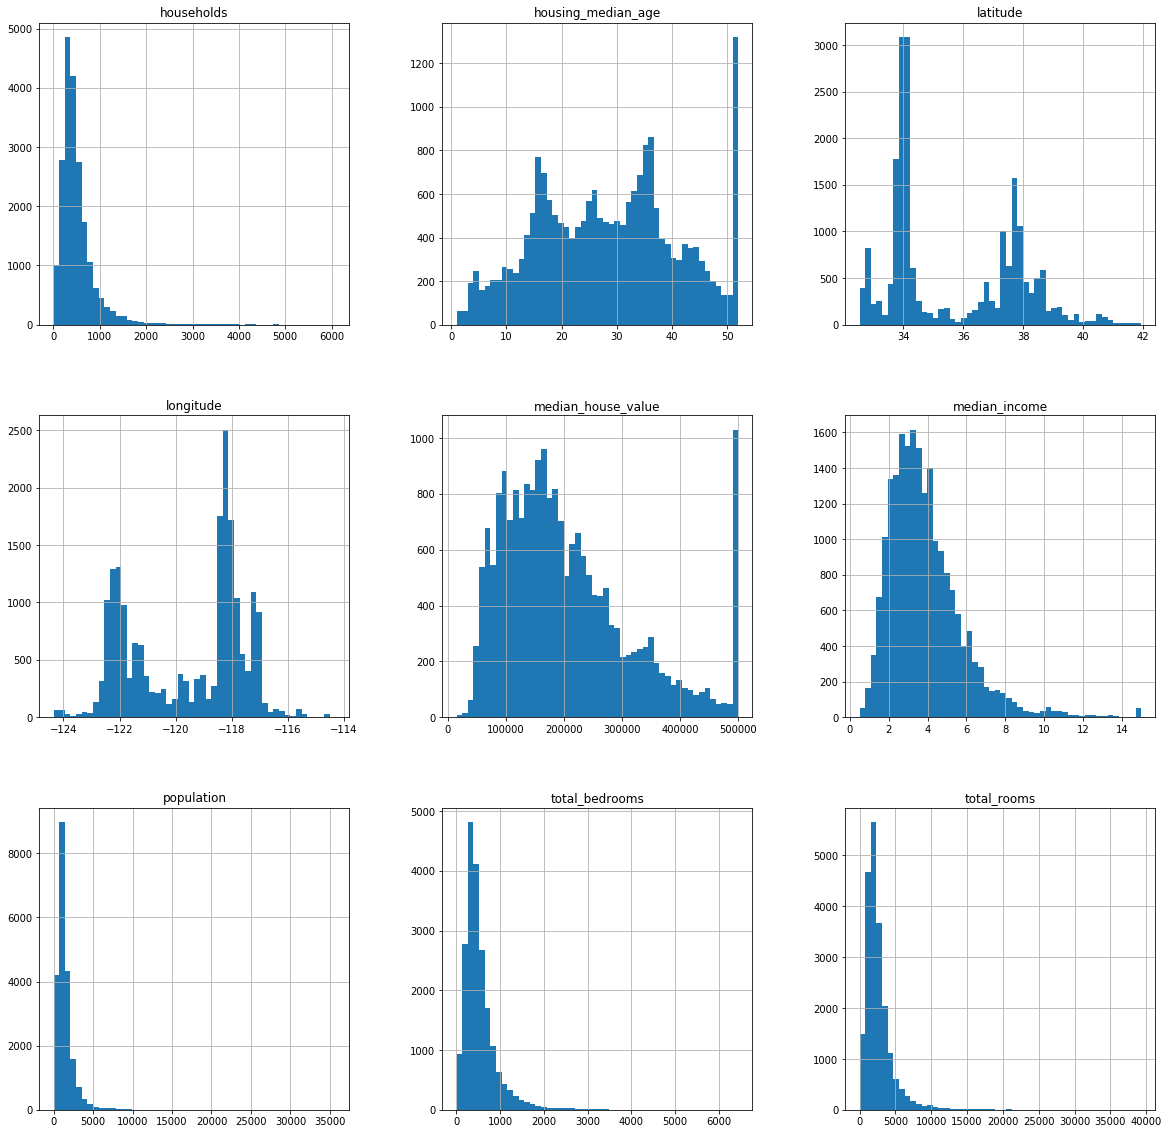

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
dataframe.hist(bins=50 , figsize=(20,20))

In [15]:
import numpy as np

In [16]:
def split_train_test(data , test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_indices = shuffled_indices[:int(len(data)* test_ratio)]
    train_indices = shuffled_indices[int(len(data)* test_ratio):]
    return data.iloc[train_indices] , data.iloc[test_indices]
    

In [17]:
# split_train_test(dataframe , 0.2)

In [18]:
train_set , test_set = split_train_test(dataframe  , 0.2)
print(len(train_set) , len(test_set))


16512 4128


In [19]:
import hashlib

In [20]:
def test_set_check(identifier  , test_ratio , hash):
#     print(hash(np.int64(identifier)).digest()[-1])
    return hash(np.int64(identifier)).digest()[-1] < 256*test_ratio

def split_train_test_by_id(data , test_ratio , id_column , hash = hashlib.md5):
    ids = data[id_column]
#     print(ids)
    in_test_set = ids.apply(lambda id_: test_set_check(id_ , test_ratio , hash))
#     print(in_test_set)
    return data.loc[~in_test_set] , data.loc[in_test_set]

In [21]:
split_train_test_by_id(dataframe.reset_index(),0.2 , "index")

(       index  longitude  latitude  housing_median_age  total_rooms  \
 0          0    -122.23     37.88                41.0        880.0   
 1          1    -122.22     37.86                21.0       7099.0   
 2          2    -122.24     37.85                52.0       1467.0   
 3          3    -122.25     37.85                52.0       1274.0   
 6          6    -122.25     37.84                52.0       2535.0   
 ...      ...        ...       ...                 ...          ...   
 20634  20634    -121.56     39.27                28.0       2332.0   
 20635  20635    -121.09     39.48                25.0       1665.0   
 20636  20636    -121.21     39.49                18.0        697.0   
 20638  20638    -121.32     39.43                18.0       1860.0   
 20639  20639    -121.24     39.37                16.0       2785.0   
 
        total_bedrooms  population  households  median_income  \
 0               129.0       322.0       126.0         8.3252   
 1              

In [22]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(dataframe ,test_size =  0.2 ,random_state =  42)

In [23]:
dataframe["income_cat"] = np.ceil(dataframe["median_income"]/1.5)
dataframe["income_cat"].where(dataframe["median_income"] < 5 , 5.0 ,inplace = True)

In [24]:
dataframe["income_cat"].describe()

count    20640.000000
mean         3.110707
std          1.188312
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: income_cat, dtype: float64

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1 , test_size=0.2 , random_state= 42)
for train_index , test_index in split.split(dataframe , dataframe["income_cat"]):
#     print (train_index , test_index)
    strat_train_set =dataframe.loc [train_index]
    strat_test_set =dataframe.loc [test_index]


In [110]:
# strat_train_set.shape
dataframe["income_cat"].value_counts()

(16512, 10)

In [27]:
for category in (strat_test_set , strat_train_set):
    category.drop(["income_cat"] , axis=1 ,inplace=True)

In [28]:
housing = strat_train_set.copy()

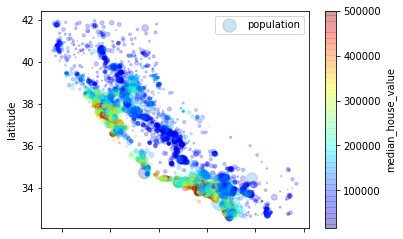

In [29]:
housing.plot(kind = "scatter" , x = "longitude" , y ="latitude" , alpha = 0.21 , s= housing["population"]/100 , label = "population" , c = "median_house_value" , cmap = plt.get_cmap("jet") , colorbar = True
            )

In [30]:
corr_matrix = housing.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A653CE5948>,
      dtype=object)

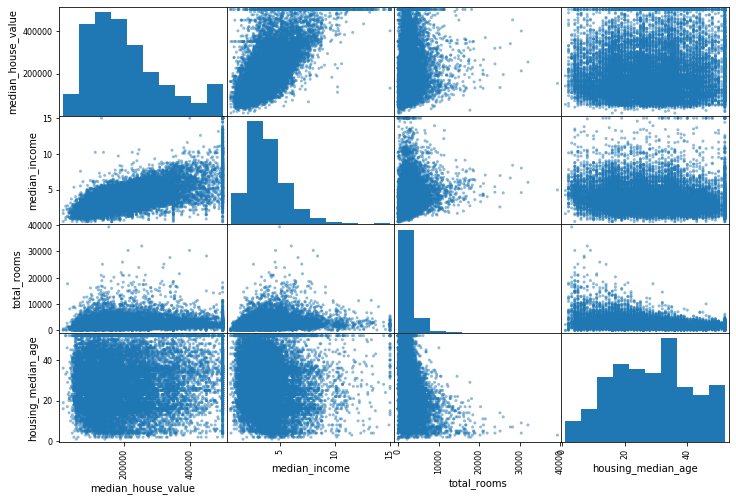

In [31]:
import pandas
from pandas.plotting import scatter_matrix


attributes = ["median_house_value" , "median_income" , "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes] , figsize = (12,8))

In [32]:
housing_features = strat_train_set.drop("median_house_value" , axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
#manual cleaning
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

17172     164.0
5293      656.0
14663     534.0
13986     619.0
16896     734.0
          ...  
19786     300.0
9969      393.0
14621    1051.0
9183     3945.0
11682    1615.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [125]:
##sklearn cleaning
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

housing_numerical_classes = housing_features.drop("ocean_proximity" , axis=1)

imputer.fit(housing_numerical_classes)

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [126]:
imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [127]:
housing_numerical_classes.median().values


array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [128]:
X = imputer.transform(housing_numerical_classes)
housing_tr  = pd.DataFrame(X , columns= housing_numerical_classes.columns)

In [129]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574977,35.637110,28.616521,2626.611676,534.960514,1422.233527,498.073765,3.872942
std,2.002892,2.137276,12.553759,2147.697675,413.797793,1119.688333,379.279775,1.896647
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.802500,33.940000,18.000000,1443.750000,296.000000,784.000000,279.000000,2.566775
50%,-118.520000,34.260000,29.000000,2120.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3136.250000,641.000000,1720.000000,602.000000,4.740575
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [130]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing_features["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 0, 4, ..., 4, 0, 0])

In [131]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [132]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
housing_cat_1hot = one_hot.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [133]:
from sklearn.preprocessing import LabelBinarizer
encoder1 = LabelBinarizer()
housing_cat_1hot_direct = encoder1.fit_transform(housing_cat)
housing_cat_1hot_direct

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [135]:
from sklearn.base import BaseEstimator , TransformerMixin

rooms_ix , bedrooms_ix , population_ix , household_ix = 3,4,5,6


class Combined_Attributes_adder(BaseEstimator , TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self , X ,y=None):
        return self
    def transform(self , X ,y = None):
        rooms_per_household = X[:,population_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] /X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household , population_per_household , bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household , population_per_household ] 
    
        
attr_adder = Combined_Attributes_adder(add_bedrooms_per_room=False)
housing_extra_attrib = attr_adder.transform(housing_features.values)
        
        
        
        

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([("imputer" , Imputer(strategy = "median")),
                         ("attribs_adder" , Combined_Attributes_adder()),
                         ("std_scalar" , StandardScaler()),])

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
household_numerical_tr = num_pipeline.fit_transform(housing_numerical_classes)

In [138]:
household_numerical_tr

array([[-1.34061366,  0.81549736, -0.04911198, ..., -0.03422926,
        -0.03422926, -1.04577332],
       [ 0.57167919, -0.73324997,  0.7474863 , ..., -0.08531427,
        -0.08531427, -0.19129614],
       [ 1.22575325, -1.32748233,  0.03054785, ..., -0.03668564,
        -0.03668564, -0.43696737],
       ...,
       [ 1.20078859, -1.33684032, -0.92537009, ...,  0.01738116,
         0.01738116,  0.96023236],
       [ 0.51176401, -0.57416414, -1.64230855, ..., -0.04061665,
        -0.04061665, -0.42774133],
       [ 0.78138233, -0.82682987, -0.28809147, ..., -0.02525611,
        -0.02525611,  0.65558725]])

In [139]:
from sklearn.pipeline import FeatureUnion
# from sklearn_features.transformers import DataFrameSelector

In [140]:
num_attribues = list(housing_numerical_classes)
cat_attributes = ["ocean_proximity"]

In [141]:
from sklearn.base import BaseEstimator ,TransformerMixin

class DataFrameSelector(BaseEstimator , TransformerMixin):
    def __init__(self , attributes_name):
        self.attributes_name = attributes_name
    def fit(self , X ,y=None):
        return self
    def transform(self , X):
        return X[self.attributes_name].values

In [142]:
num_pipeline_new = Pipeline([("selector" , DataFrameSelector(num_attribues)),
                             ("imputer" , Imputer(strategy= "median")),
                              ("attr_adder" , Combined_Attributes_adder()),
                            ("std_scalar" , StandardScaler() )])

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [143]:
cat_pipeline = Pipeline([("selector" , DataFrameSelector(cat_attributes)),
                         ("one_hot_encoder" , OneHotEncoder(sparse = False))])
#                          ("label_binarizer" , LabelBinarizer())]) this doesnt work because of 2 positional arguments 3 r given
                         

In [144]:
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline" , num_pipeline_new) , ("cat_pipeline" ,cat_pipeline)])

In [145]:
housing_prepared  = full_pipeline.fit_transform(housing_features)

In [146]:
housing_prepared.shape

(16512, 16)

# Training and model evaluation

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared , housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepare = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepare)

array([396086.27134651, 413725.89731133, 228295.00066478,  98908.31729878,
       289791.04779354])

In [150]:
print(some_labels)

17172    500001.0
5293     500001.0
14663    174200.0
13986     91400.0
16896    434000.0
Name: median_house_value, dtype: float64


In [151]:
from sklearn.metrics import mean_squared_error

housing_predictions  = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels , housing_predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

68730.06951777506

In [152]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared , housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [153]:
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels , housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

In [154]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg , housing_prepared , housing_labels , 
                         scoring="neg_mean_squared_error" , cv=10)
remse_scores = np.sqrt(-scores)

In [155]:
remse_scores

array([69206.24390938, 69093.93304022, 68981.51717742, 71703.86693825,
       73737.3979956 , 75624.98145797, 67086.87513353, 67452.09134947,
       76116.18423122, 73084.10624169])

In [156]:
def display_scores(scores):
    print("scores" , scores)
    print("mean" , scores.mean())
    print("stand dev " , scores.std())

In [157]:
display_scores(remse_scores)

scores [69206.24390938 69093.93304022 68981.51717742 71703.86693825
 73737.3979956  75624.98145797 67086.87513353 67452.09134947
 76116.18423122 73084.10624169]
mean 71208.71974747485
stand dev  3135.0846497371344


In [158]:
scores_lin_reg = cross_val_score(lin_reg , housing_prepared , housing_labels , 
                         scoring="neg_mean_squared_error" , cv=10)

In [159]:
lin_rmse_scores = np.sqrt(-scores_lin_reg)

In [160]:
display_scores(lin_rmse_scores)

scores [66596.22452599 64043.09617662 67127.81504222 72713.45185442
 68803.94766652 72290.35535506 67946.61484382 68873.56919173
 71534.8805779  70210.56009457]
mean 69014.05153288678
stand dev  2598.526774587793


In [161]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels)

c:\users\shubh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [162]:
scores_ensemble = cross_val_score(forest_reg , housing_prepared , housing_labels , 
                         scoring="neg_mean_squared_error" , cv=10)

In [163]:
score_rmse_forest = np.sqrt(-scores_ensemble)
display_scores(score_rmse_forest)

scores [53667.38580216 50044.30156346 51262.67938237 53627.70287574
 54400.63377021 57847.15550396 54093.28433594 51459.43518265
 57016.51720413 55712.20127118]
mean 53913.12968917928
stand dev  2382.635952315137


In [164]:
from sklearn.externals import joblib

joblib.dump(tree_reg , "tree_reg.pkl")

['tree_reg.pkl']

In [165]:
joblib.dump(lin_reg , "lin_reg.pkl")

['lin_reg.pkl']

In [166]:
joblib.dump(forest_reg , "forest_reg.pkl")

['forest_reg.pkl']

In [167]:
from sklearn.model_selection import GridSearchCV


param_grid = [{ "n_estimators" : [3,10,30]  , "max_features" : [2,4,6,8]} , 
               {"bootstrap" : [False] , "n_estimators" : [3,10] , "max_features" : [2,3,4]}]

In [168]:
forest_reg_new = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg_new , param_grid , cv=5 , scoring= "neg_mean_squared_error")

grid_search.fit(housing_prepared , housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [169]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [170]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [171]:
cvres = grid_search.cv_results_

for mean_score , parameters in zip(cvres["mean_test_score"] , cvres["params"]):
    print(np.sqrt(-mean_score) , parameters)

64500.25679195187 {'max_features': 2, 'n_estimators': 3}
55913.34670992613 {'max_features': 2, 'n_estimators': 10}
53533.21487876534 {'max_features': 2, 'n_estimators': 30}
61087.04491629023 {'max_features': 4, 'n_estimators': 3}
53455.35753955743 {'max_features': 4, 'n_estimators': 10}
51455.14954805996 {'max_features': 4, 'n_estimators': 30}
59527.86763905868 {'max_features': 6, 'n_estimators': 3}
53216.23799445554 {'max_features': 6, 'n_estimators': 10}
51105.52979383834 {'max_features': 6, 'n_estimators': 30}
59010.25658566295 {'max_features': 8, 'n_estimators': 3}
53385.816767381 {'max_features': 8, 'n_estimators': 10}
51208.984576258175 {'max_features': 8, 'n_estimators': 30}
63521.707513790054 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54952.70240782704 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61453.583944261234 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53311.69934585578 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [172]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance.argmax()

7

In [185]:
final_model = grid_search.best_estimator_
joblib.dump(final_model , "final_model.pkl")

['final_model.pkl']

In [175]:
# print(strat_test_set.head())


x_test1 = strat_test_set.drop("median_house_value" , axis=1)
y_test1 = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(x_test1)


In [176]:
final_predict = final_model.predict(x_test_prepared)


In [178]:
final_mse = mean_squared_error(y_test1 , final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

46850.05855190929

In [184]:
# final_model.predict(x_test_prepared)

array([150910.        , 428530.46666667, 204186.66666667, ...,
       212560.        , 225913.33333333, 229393.36666667])

# using the model

In [188]:
from joblib import load , dump

last_model = load("final_model.pkl")

In [191]:
testing_features = np.array([[ 0.79636112, -0.72857098, -0.92537009,  0.47186297,  0.7130256 ,
        1.88876713,  0.8145322 , -0.20802692,  0.11313462,  0.11313462,
        0.230931  ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ]])


In [198]:
# x_test_prepared
y_test1

6142     152200.0
5245     500001.0
9976     303300.0
11993    375000.0
12919    136400.0
           ...   
14978    113800.0
2927      51600.0
12625    174500.0
12012    246400.0
387      246200.0
Name: median_house_value, Length: 4128, dtype: float64

In [193]:
last_model.predict(testing_features)

array([150910.])